## Assignment 1 by Group 3

#### Team Member: Chuanting Zong, Zizhao Wang, Xinyu Zou

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 1

In [2]:
#read the csv file
df = pd.read_csv("home_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_price = df[["price", "zipcode"]]

In [5]:
df_price.head()

,price,zipcode
0,221900,98178
1,538000,98125
2,180000,98028
3,604000,98136
4,510000,98074


## 1. Selection and summary statistics

In [6]:
df_price.groupby("zipcode")["price"].mean()

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
             ...     
98177    6.761854e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028789e+05
98199    7.918208e+05
Name: price, Length: 70, dtype: float64

In [7]:
max_price = df_price.groupby("zipcode")["price"].mean().max()

In [8]:
max_price_zipcode = df_price.groupby("zipcode")["price"].mean().idxmax()

In [9]:
print("The zipcode of the highest average house sale price is", max_price_zipcode)

The zipcode of the highest average house sale price is 98039


In [10]:
print("The highest average house sale price is", max_price)

The highest average house sale price is 2160606.6


## 2. Filtering Data

In [11]:
df2 = df.loc[(df["sqft_living"] > 2000) & (df["sqft_living"] <= 4000)]

In [12]:
len(df2)/len(df)

0.42187572294452413

## 3. Visualization

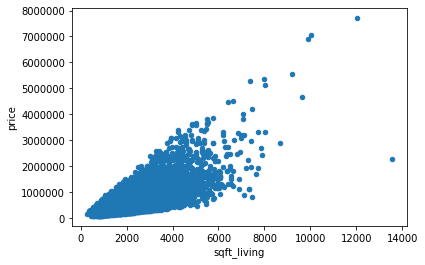

In [13]:
df.plot(x="sqft_living", y="price", kind="scatter")

## 4. Building regression models with different features (all models must be fit on the original sales dataset, not the one filtered on `sqft_living`. Do not split the data into training and test sets)

### Build a regression model to predict house prices using just ‘sqft_living’ and add the trend line in the plot in part 3. Report the intercept and slope.

In [14]:
x1 = df[["sqft_living"]]
y1 = df.price

In [15]:
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression().fit(x1, y1)

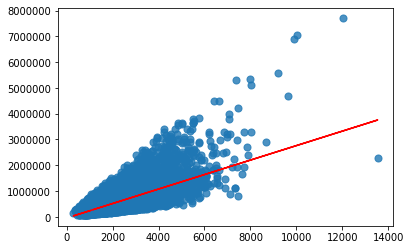

In [16]:
plt.scatter(x1, y1, marker="o", s=50, alpha=0.8)
plt.plot(x1, linreg1.coef_ * x1 + linreg1.intercept_, "r-")
plt.show()

In [17]:
print("linear model coeff(w): {}".format(linreg1.coef_))
print("linear model intercept(b): {:.3f}".format(linreg1.intercept_))
print("R-squared score: {:.3f}".format(linreg1.score(x1,y1)))

linear model coeff(w): [280.62356663]
linear model intercept(b): -43580.740
R-squared score: 0.493


### Using this simple regression model, what is the predicted price for a house with 2650 sqft?

In [18]:
x1_new = [[2650]]

In [19]:
linreg1.predict(x1_new)

array([700071.71125207])

### Using this simple regression model, what is the estimated square-feet for a house costing $800,000? 

In [20]:
target_price = 800000
w = '280.62356663'
b = '-43580.740'
estimated_sqrt = (target_price - float(b)) / float(w)
print("The estimated square-feet is:", estimated_sqrt)

The estimated square-feet is: 3006.0937152589704


### Build a regression model to predict house prices using just ‘bedrooms’. Report the intercept and slope.

In [21]:
x2 = df[["bedrooms"]]
y2 = df.price

In [22]:
linreg2 = LinearRegression().fit(x2, y2)
print("linear model coeff(w): {}".format(linreg2.coef_))
print("linear model intercept(b): {:.3f}".format(linreg2.intercept_))
print("R-squared score: {:.3f}".format(linreg2.score(x2,y2)))

linear model coeff(w): [121716.12623836]
linear model intercept(b): 129802.357
R-squared score: 0.095


### Using this simple regression model, what is the predicted price for a house with 3 bedrooms?

In [23]:
x2_new = [[3]]
linreg2.predict(x2_new)

array([494950.73609399])

### Compute and compare the RMSE (root mean squared error) of the two models.

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin1_prediction = linreg1.predict(x1)
lin1_mse = mean_squared_error(y1, lin1_prediction)
lin1_rmse = np.sqrt(lin1_mse)
lin1_rmse

261440.79072267728

In [25]:
lin2_prediction = linreg2.predict(x2)
lin2_mse = mean_squared_error(y2, lin2_prediction)
lin2_rmse = np.sqrt(lin2_mse)
lin2_rmse

349230.1491907254

#### The first regression has less root mean squared error than the second regression

# Part 2

## 1. Load the breast cancer dataset. Import the functions `load_breast_cancer` from `sklearn.datasets`.

In [26]:
from sklearn.datasets import load_breast_cancer
from matplotlib import colors
%matplotlib inline

## 2. Provide an explanation of the data set.


In [27]:
breastcancer_dataset = load_breast_cancer()
breastcancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### This dataset contains 568 data points of breast cancer samples, each column contains the corresponding feature of the breast cancer sample. This dataset contains 30 different features. This dataset contains measurements of various features from digitized images of fine needle aspirates (FNA) of breast masses. The goal is to classify the samples as either malignant (cancerous) or benign (non-cancerous).

## 3. What are the features in the data set?


In [28]:
features = breastcancer_dataset.feature_names
print("The features: ", features)

The features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 4. Create some basic visualization of the data set.


In [29]:
df_breast = pd.DataFrame(breastcancer_dataset.data, columns=breastcancer_dataset.feature_names)
df_feature = df_breast.iloc[:,:4]
df_feature.head()

,mean radius,mean texture,mean perimeter,mean area
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc941fd9510>,
      dtype=object)

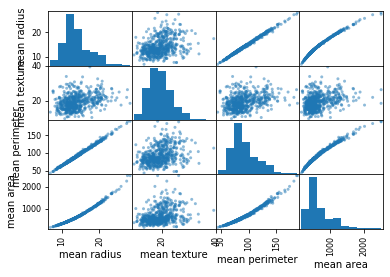

In [30]:
pd.plotting.scatter_matrix(df_feature)

#### We choose the first four columns of the feature_names to generate the scatter plot. 

## 5. Split the data into training set (80%) and test set (20%) using random_state = 0.


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(breastcancer_dataset['data'], breastcancer_dataset['target'], test_size = 0.2, random_state = 0)

In [32]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (455, 30)
y_train shape:  (455,)


In [33]:
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_test shape:  (114, 30)
y_test shape:  (114,)


## 6. Build KNN models with n_neighbors = {1, 2, 3, 4, 5}. Compare their performance on the training set and test set. Which one is the best model?

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
print(f"When n_neighbors = 1, accuracy on training set: {knn.score(x_train, y_train):.2f}")
print(f"When n_neighbors = 1, accuracy on test set: {knn.score(x_test, y_test):.2f}")

When n_neighbors = 1, accuracy on training set: 1.00
When n_neighbors = 1, accuracy on test set: 0.91


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
print(f"When n_neighbors = 2, accuracy on training set: {knn.score(x_train, y_train):.2f}")
print(f"When n_neighbors = 2, accuracy on test set: {knn.score(x_test, y_test):.2f}")

When n_neighbors = 2, accuracy on training set: 0.96
When n_neighbors = 2, accuracy on test set: 0.89


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print(f"When n_neighbors = 3, accuracy on training set: {knn.score(x_train, y_train):.2f}")
print(f"When n_neighbors = 3, accuracy on test set: {knn.score(x_test, y_test):.2f}")

When n_neighbors = 3, accuracy on training set: 0.96
When n_neighbors = 3, accuracy on test set: 0.91


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
print(f"When n_neighbors = 4, accuracy on training set: {knn.score(x_train, y_train):.2f}")
print(f"When n_neighbors = 4, accuracy on test set: {knn.score(x_test, y_test):.2f}")

When n_neighbors = 4, accuracy on training set: 0.95
When n_neighbors = 4, accuracy on test set: 0.92


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
print(f"When n_neighbors = 5, accuracy on training set: {knn.score(x_train, y_train):.2f}")
print(f"When n_neighbors = 5, accuracy on test set: {knn.score(x_test, y_test):.2f}")

When n_neighbors = 5, accuracy on training set: 0.95
When n_neighbors = 5, accuracy on test set: 0.94


#### When n_neighbors = 5 is the best model, since the accurancy of training set is high while the accurancy of the test is high. 